In [30]:
import numpy as np
import pandas as pd
from PIL import Image, ImageFont, ImageDraw, ImageEnhance

In [35]:
classes = pd.read_csv('class_names.csv')['class_name']
n_classes = len(classes)
n_grid_cell = 7 
n_conf_box = 1  
threshold = 0.5
font = ImageFont.load_default()

In [41]:
class Box:
    def __init__(self):
        self.x = float()
        self.y = float()
        self.w = float()
        self.h = float()
        self.c = float()
        self.prob = float()

In [8]:
def overlap(x1,w1,x2,w2):
    l1 = x1 - w1 / 2.
    l2 = x2 - w2 / 2.
    left = max(l1, l2)
    r1 = x1 + w1 / 2.
    r2 = x2 + w2 / 2.
    right = min(r1, r2)
    return right - left

In [9]:
def box_intersection(a, b):
    w = overlap(a.x, a.w, b.x, b.w)
    h = overlap(a.y, a.h, b.y, b.h)
    if w < 0 or h < 0: return 0
    area = w * h
    return area

In [10]:
def box_union(a, b):
    i = box_intersection(a, b)
    u = a.w * a.h + b.w * b.h - i
    return u

In [64]:
def box_iou(a, b):
    return box_intersection(a, b) / box_union(a, b)

In [ ]:
def gen_box(netout, b):
    box = Box()
    box.c = 
    box.x = 
    box.y =
    box.w =
    box.h =
    return box

In [66]:
def nonmax_suppression(netout):
    boxes = []
    for grid in range(n_grid_cell * n_grid_cell):
        for b in range(n_conf_box):
            if pc >= threshold:
                boxes.append(gen_box(netout, b))
    # Sort boxes
    boxes.sort(key=lambda b: b.prob,reverse=True)
    for i in range(len(boxes)):
        box = boxes[i]
        for j in range(i+1, len(box)):
            if box_iou(box, box[j]) >= 0.5:
                boxes[j].prob = 0.
    return [b for b in boxes if b.prob > 0.]
        

In [60]:
def draw_box(boxes, img_arr, color=(255,0,0)):
    img_result = Image.fromarray(img_arr,'RGB')
    w, h, _ = img_arr.shape
    for box in boxes:
        # calc l-t-w-h
        left = int((box.x - box.w/2.) * w)
        top = int((box.y - box.h/2.) * h)
        width = int(box.w * w)
        height = int(box.h * h)
        
        # draw image
        text = classes[box.c.index(1)]
        draw = ImageDraw.Draw(img_result)
        draw.rectangle([left, top, left+width, top+height],outline=color)
        draw.text([left+4, top+4], text, color, font)
    
    # save image to file
    #img_result.save("output.jpg", "JPEG")
    return img_result

In [50]:
data = np.load('../dataset/my_dict.npy').item()

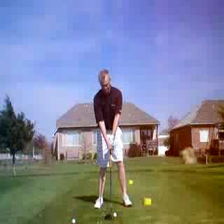

In [51]:
arr_img = data['X_train'][0]
src_image = Image.fromarray(arr_img)
src_image

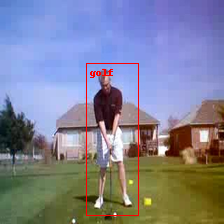

In [61]:
box = Box()
box.x = 0.5015625
box.y = 0.62291667
box.w = 0.234375
box.h = 0.67916667
box.c = [0,0,0,1]
draw_box([box],arr_img)